<a href="https://colab.research.google.com/github/hacksJuanDavid/PokemonsClusterAndClassification/blob/main/PokemonsClusterAndClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries for the Pokemons Clustering and Classficiation**




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint, uniform
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, mean_squared_error, roc_curve, auc, confusion_matrix,  ConfusionMatrixDisplay

# **Read data from pokedex csv**


In [ ]:
# Load the CSV file into a DataFrame
df = pd.read_csv('data_pokemons/pokedex.csv')  # Replace 'pokemon_data.csv' with the actual file name

# Print the DataFrame
df

,Image,Index,Name,Type 1,Type 2,Total,HP,Attack,Defense,SP. Atk.,SP. Def,Speed
0,images/1.png,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,images/2.png,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,images/3.png,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,images/4.png,3,Venusaur Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80
4,images/5.png,4,Charmander,Fire,NaN,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...,...,...,...,...
1210,images/1211.png,1023,Iron Crown,Steel,Psychic,590,90,72,100,122,108,98
1211,images/1212.png,1024,Terapagos Normal Form,Normal,NaN,450,90,65,85,65,85,60
1212,images/1213.png,1024,Terapagos Terastal Form,Normal,NaN,600,95,95,110,105,110,85
1213,images/1214.png,1024,Terapagos Stellar Form,Normal,NaN,700,160,105,110,130,110,85


# **Information in dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Image     1215 non-null   object
 1   Index     1215 non-null   int64 
 2   Name      1215 non-null   object
 3   Type 1    1215 non-null   object
 4   Type 2    669 non-null    object
 5   Total     1215 non-null   int64 
 6   HP        1215 non-null   int64 
 7   Attack    1215 non-null   int64 
 8   Defense   1215 non-null   int64 
 9   SP. Atk.  1215 non-null   int64 
 10  SP. Def   1215 non-null   int64 
 11  Speed     1215 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 114.0+ KB


# **Remove nulls in dataset is optional apply**

In [ ]:
# Remove rows with null values in any column
df = df.dropna()

# Dataframe
df

,Image,Index,Name,Type 1,Type 2,Total,HP,Attack,Defense,SP. Atk.,SP. Def,Speed
0,images/1.png,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,images/2.png,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,images/3.png,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,images/4.png,3,Venusaur Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80
6,images/7.png,6,Charizard,Fire,Flying,534,78,84,78,109,85,100
...,...,...,...,...,...,...,...,...,...,...,...,...
1207,images/1208.png,1020,Gouging Fire,Fire,Dragon,590,105,115,121,65,93,91
1208,images/1209.png,1021,Raging Bolt,Electric,Dragon,590,125,73,91,137,89,75
1209,images/1210.png,1022,Iron Boulder,Rock,Psychic,590,90,120,80,68,108,124
1210,images/1211.png,1023,Iron Crown,Steel,Psychic,590,90,72,100,122,108,98


# **Search class pokemons**

In [ ]:
# Search types pokemons in dataset
if 'Type 1' in df.columns and 'Type 2' in df.columns:
    unique_type_1 = df['Type 1'].unique()
    unique_type_2 = df['Type 2'].unique()

    print("Unique 'Type 1':", unique_type_1)
    print("Unique 'Type 2':", unique_type_2)

    total_unique_types = set(unique_type_1).union(set(unique_type_2))
    print("Count types pokemons:", len(total_unique_types))
    print("Unique types pokemons:", total_unique_types)

Unique 'Type 1': ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Dark' 'Poison' 'Electric' 'Ground'
 'Ice' 'Fairy' 'Steel' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Dragon'
 'Flying']
Unique 'Type 2': ['Poison' nan 'Flying' 'Dragon' 'Normal' 'Psychic' 'Steel' 'Ground'
 'Fairy' 'Grass' 'Rock' 'Fighting' 'Electric' 'Ice' 'Dark' 'Ghost' 'Fire'
 'Water' 'Bug']
Count types pokemons: 19
Unique types pokemons: {'Normal', 'Ghost', 'Ice', 'Rock', nan, 'Grass', 'Steel', 'Ground', 'Fairy', 'Poison', 'Psychic', 'Dragon', 'Dark', 'Fire', 'Fighting', 'Flying', 'Bug', 'Electric', 'Water'}


# **Replace string class with numeric class**

In [ ]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'Type 1' column
df.loc[:, 'Type 1'] = label_encoder.fit_transform(df['Type 1'].astype(str))

# Fit and transform the 'Type 2' column
df.loc[:, 'Type 2'] = label_encoder.fit_transform(df['Type 2'].astype(str))

# Print the DataFrame with converted columns
df

,Image,Index,Name,Type 1,Type 2,Total,HP,Attack,Defense,SP. Atk.,SP. Def,Speed
0,images/1.png,1,Bulbasaur,9,13,318,45,49,49,65,65,45
1,images/2.png,2,Ivysaur,9,13,405,60,62,63,80,80,60
2,images/3.png,3,Venusaur,9,13,525,80,82,83,100,100,80
3,images/4.png,3,Venusaur Mega Venusaur,9,13,625,80,100,123,122,120,80
4,images/5.png,4,Charmander,6,18,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...,...,...,...,...
1210,images/1211.png,1023,Iron Crown,16,14,590,90,72,100,122,108,98
1211,images/1212.png,1024,Terapagos Normal Form,12,18,450,90,65,85,65,85,60
1212,images/1213.png,1024,Terapagos Terastal Form,12,18,600,95,95,110,105,110,85
1213,images/1214.png,1024,Terapagos Stellar Form,12,18,700,160,105,110,130,110,85


# **Information columns names**

In [ ]:
df.columns

Index(['Image', 'Index', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack',
       'Defense', 'SP. Atk.', 'SP. Def', 'Speed'],
      dtype='object')

# **Apply method Elbow for search optimal "K"**

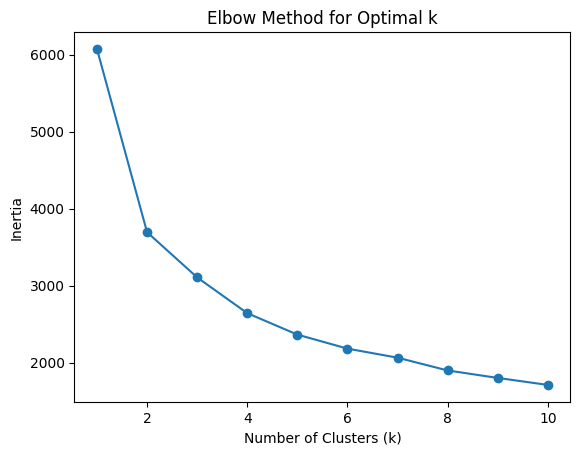

In [ ]:
# Select the features for clustering
X = df[['Total','HP','Attack','Defense','Speed']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate the inertia for different values of k
inertia = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_scaled)
  inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

## **Análisis Elbow**

En base a las diferentes variables que asignadas en el cluster, el metodo del codo indica que la cantidad efectiva para los clusters es de 2, por lo tanto indica que entre mas clusters se agregen la optimizacion de ellos es mas variante.

# **Apply clustering using Kmeans**

In [ ]:
# Select characteristics for the clusters
X = df[['Total','HP','Attack','Defense','Speed']]

# Scaled characteristics
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply reduce dimension in components used PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Settings for of model KMeans using the characteristics rudeced for PCA
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
kmeans.fit(X_pca)

# Add clustering option in column of dataframe
df['PredictionCluster'] = kmeans.predict(X_pca)

# Evaluation of clustering used Silhouette Score
silhouette_avg = silhouette_score(X_pca, kmeans.labels_)
print(f"Silhouette Score con PCA y Feature Engineering: {silhouette_avg}")

# Print Dataframe
df

Silhouette Score con PCA y Feature Engineering: 0.43895056773494834


,Image,Index,Name,Type 1,Type 2,Total,HP,Attack,Defense,SP. Atk.,SP. Def,Speed,PredictionCluster
0,images/1.png,1,Bulbasaur,9,13,318,45,49,49,65,65,45,1
1,images/2.png,2,Ivysaur,9,13,405,60,62,63,80,80,60,1
2,images/3.png,3,Venusaur,9,13,525,80,82,83,100,100,80,0
3,images/4.png,3,Venusaur Mega Venusaur,9,13,625,80,100,123,122,120,80,0
4,images/5.png,4,Charmander,6,18,309,39,52,43,60,50,65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,images/1211.png,1023,Iron Crown,16,14,590,90,72,100,122,108,98,0
1211,images/1212.png,1024,Terapagos Normal Form,12,18,450,90,65,85,65,85,60,0
1212,images/1213.png,1024,Terapagos Terastal Form,12,18,600,95,95,110,105,110,85,0
1213,images/1214.png,1024,Terapagos Stellar Form,12,18,700,160,105,110,130,110,85,0


# **Análisis de los Resultados de Silhouette Score en Clustering**

El **Silhouette Score** es una métrica utilizada para evaluar la calidad de los clústeres creados en un algoritmo de clustering. Mide qué tan bien cada punto está asignado a su clúster, comparando su cohesión (distancia dentro del mismo clúster) y su separación (distancia con otros clústeres). El valor del Silhouette Score varía entre -1 y 1, y se interpreta de la siguiente manera:

## **Fórmula**

Para cada punto `i`, el Silhouette Score se calcula como:

    S(i) = (b(i) - a(i)) / max(a(i), b(i))

Donde:
- `a(i)`: es la distancia promedio de `i` a los otros puntos dentro de su mismo clúster.
- `b(i)`: es la distancia promedio de `i` al clúster más cercano al que no pertenece.

## **Interpretación**

- **1**: El punto está bien agrupado y muy lejos de otros clústeres, lo que indica una muy buena asignación.
- **0**: El punto está en el borde de dos clústeres, lo que sugiere que está en una zona ambigua entre dos agrupaciones.
- **-1**: El punto puede estar mal asignado al clúster equivocado, ya que está más cerca de un clúster diferente que del propio.

## **Ejemplos**

- **Silhouette Score cercano a 1**: Significa que los clústeres están bien definidos y los puntos están correctamente asignados.
- **Silhouette Score cercano a 0**: Indica que los clústeres se solapan, y los puntos están en los límites de los clústeres.
- **Silhouette Score negativo**: Significa que los puntos están asignados al clúster incorrecto.

## **Promedio del Silhouette Score**

Al calcular el promedio del Silhouette Score para todos los puntos, puedes obtener una visión general de la calidad del clustering:

- **Silhouette promedio > 0.5**: Clustering razonablemente bueno.
- **Silhouette promedio entre 0.3 y 0.5**: Indica que el clustering es adecuado, pero podría mejorarse.
- **Silhouette promedio < 0.3**: El clustering es de baja calidad y sugiere que tal vez el número de clústeres o el método de clustering no son adecuados.

Esta métrica es útil para elegir el número de clústeres correcto, comparando los valores promedio del Silhouette Score para diferentes números de clústeres y seleccionando aquel que maximice el score.


# **Análisis de Resultados de Silhouette Score en Clustering usando PCA**

El Silhouette Score es una métrica clave en el análisis de clústeres para evaluar la calidad de las agrupaciones formadas por un algoritmo de clustering. En este análisis, se realizó una reducción de dimensionalidad utilizando PCA (Análisis de Componentes Principales) antes de aplicar el algoritmo de clustering KMeans, lo que permite reducir la complejidad del modelo y mejorar la interpretación de los resultados.

## **PCA (Análisis de Componentes Principales)**
El uso de PCA en este análisis tuvo como objetivo reducir el número de variables originales a 2 componentes principales, capturando la mayor cantidad de información posible. Estos dos componentes principales representan combinaciones lineales de las características originales (Total, HP, Attack, Defense, y Speed), y permiten reducir la dimensionalidad del problema a un espacio más manejable, facilitando la visualización y el análisis de los clústeres.

## **Impacto del PCA en el Clustering**
La reducción de dimensiones mediante PCA ayuda a evitar el "curse of dimensionality" (maldición de la dimensionalidad), donde muchas variables pueden hacer que los puntos en un espacio de alta dimensión se vuelvan más difíciles de separar en clústeres definidos. Al reducir las características a dos componentes principales, el algoritmo de clustering puede identificar patrones más claros y relevantes.

## **Resultados del Clustering con PCA**
El modelo de clustering KMeans, después de reducir las dimensiones con PCA a dos componentes principales, generó los siguientes resultados:

- Número de clústeres: 2
- Silhouette Score con PCA y Feature Engineering: 0.43895056773494834

## **Interpretación del Silhouette Score**

Un Silhouette Score de 0.43895056773494834 es moderadamente bueno. Esto indica que:

- Los clústeres están algo bien definidos, pero no completamente separados. Hay cierta superposición entre los puntos de diferentes clústeres.
- Los puntos dentro de los clústeres están razonablemente agrupados, pero no están tan lejos de otros clústeres como sería ideal.
- Podría ser posible mejorar la separación de los clústeres ajustando los parámetros o aumentando el número de clústeres.

## **Conclusión**

El uso de **PCA** para reducir la dimensionalidad a dos componentes principales simplificó el proceso de clustering y mejoró la interpretabilidad del modelo. Sin embargo, el **Silhouette Score** de **0.43895056773494834** indica que, aunque los clústeres están moderadamente bien definidos, aún existe superposición entre ellos, lo que limita la separación clara de los grupos. Esto sugiere que los puntos dentro de cada clúster están relativamente cercanos, tanto a otros puntos de su mismo grupo como a puntos de otros clústeres. Si bien el resultado es aceptable, se podría mejorar la separación ajustando el número de clústeres o explorando otras técnicas de clustering que logren una mayor diferenciación entre los grupos.


# **Draw clustering relation with Attack and Defense**

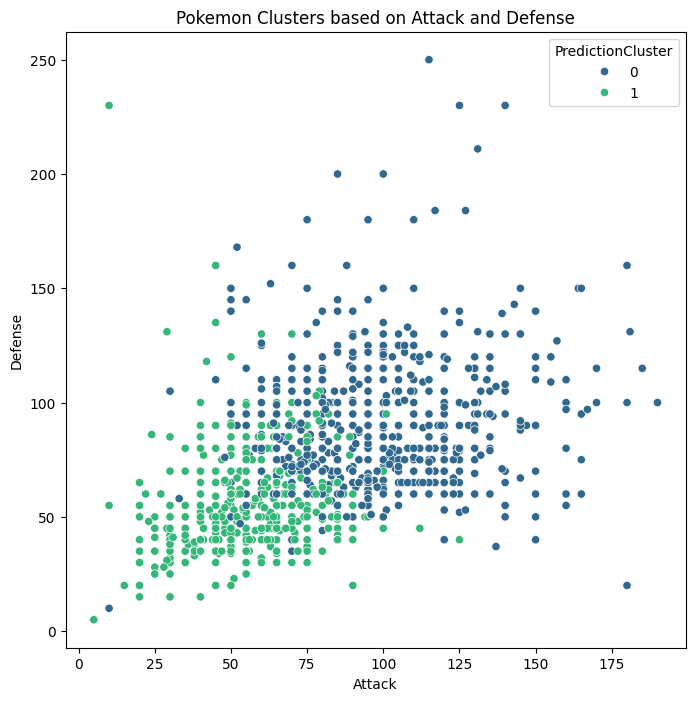

In [ ]:
# Visualize the clusters using a scatter plot
# For example Attack and Defense
plt.figure(figsize=(8, 8))
sns.scatterplot(x='Attack', y='Defense', hue='PredictionCluster', data=df, palette='viridis')
plt.title('Pokemon Clusters based on Attack and Defense')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.show()

# **Draw clustering relation with HP and Speed**

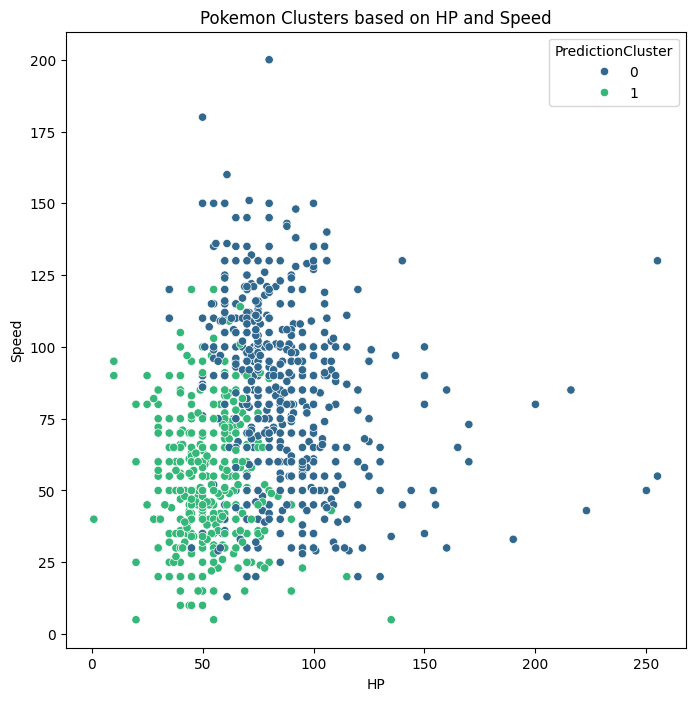

In [ ]:
# You can also visualize clusters based on other features
# For example, 'HP' and 'Speed'
plt.figure(figsize=(8, 8))
sns.scatterplot(x='HP', y='Speed', hue='PredictionCluster', data=df, palette='viridis')
plt.title('Pokemon Clusters based on HP and Speed')
plt.xlabel('HP')
plt.ylabel('Speed')
plt.show()

# **Draw 3D clustering relation with HP, Attack, Defense**

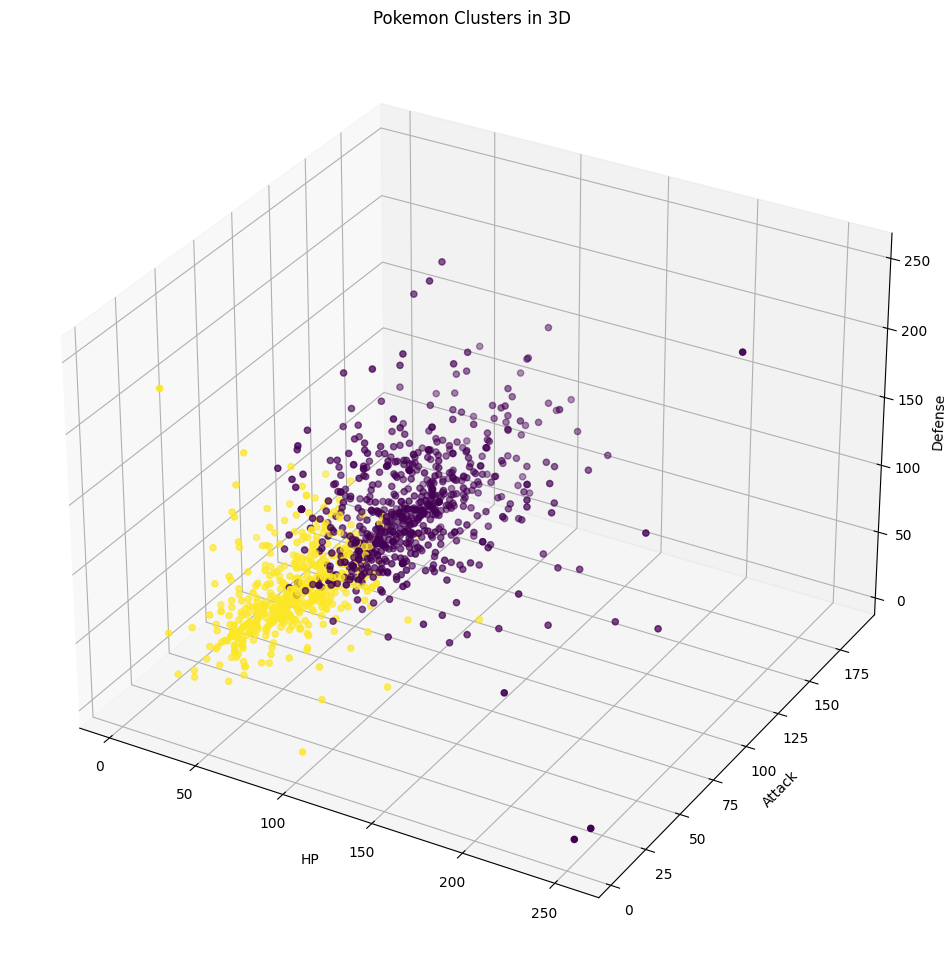

In [ ]:
# 3D Scatter Plot
# For example 'HP','Attack','Defense'
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['HP'], df['Attack'], df['Defense'], c=df['PredictionCluster'], cmap='viridis')
ax.set_xlabel('HP')
ax.set_ylabel('Attack')
ax.set_zlabel('Defense')
plt.title('Pokemon Clusters in 3D')
plt.show()

# **Create histogram frecuency for view data in moved in dataset**

array([[<Axes: title={'center': 'Index'}>,
        <Axes: title={'center': 'Total'}>,
        <Axes: title={'center': 'HP'}>],
       [<Axes: title={'center': 'Attack'}>,
        <Axes: title={'center': 'Defense'}>,
        <Axes: title={'center': 'SP. Atk.'}>],
       [<Axes: title={'center': 'SP. Def'}>,
        <Axes: title={'center': 'Speed'}>,
        <Axes: title={'center': 'PredictionCluster'}>]], dtype=object)

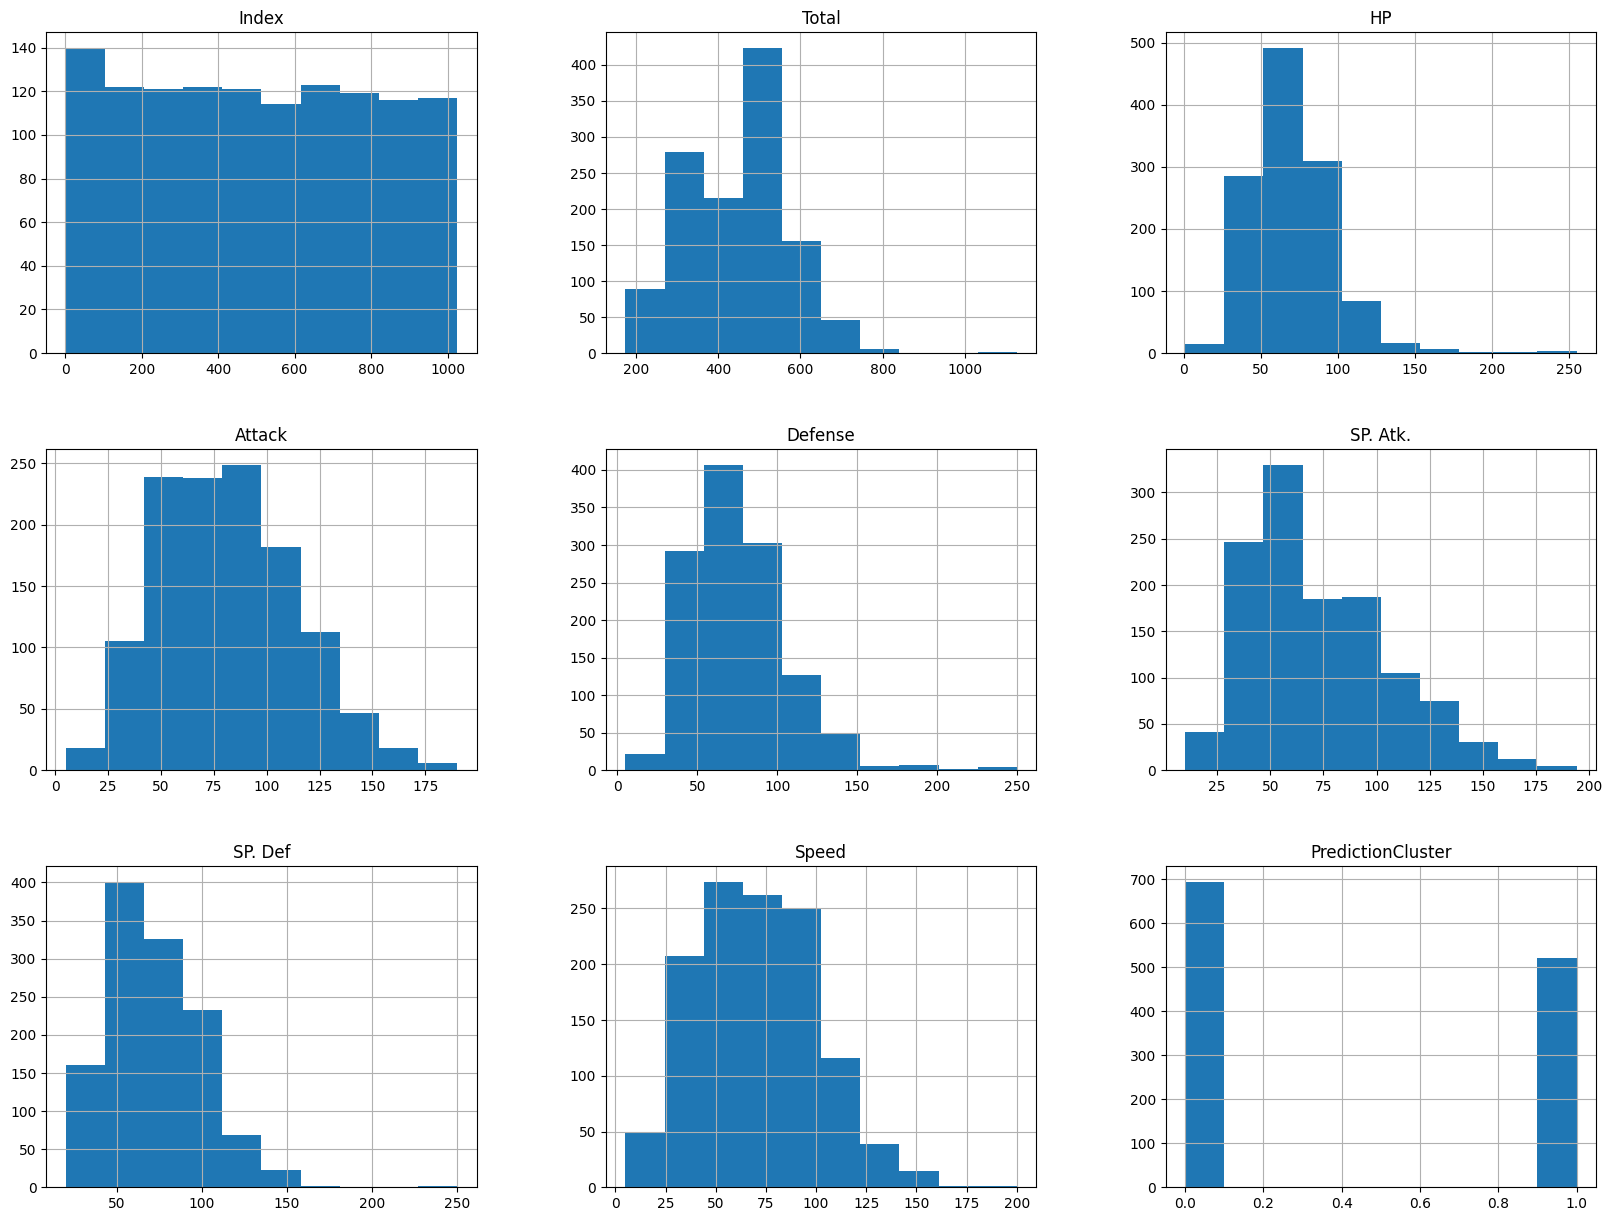

In [ ]:
# Create histogram frecuency for view data moved in set
df.hist(figsize=(20,15))

# **Count the number of occurrences in clases for column PredictionCluster**

In [ ]:
# Count the number of occurrences of each class in the 'PredictionCluster' column
class_counts = df['PredictionCluster'].value_counts()

# Print the results
print("Number of Pokemons in each cluster:")
print(class_counts)

Number of Pokemons in each cluster:
PredictionCluster
0    694
1    521
Name: count, dtype: int64


## **Análisis de balance de clases**
En el conteo de clases se nota un poco de desbalance entre ellas, pero eso no quiere decir que son totalmente desproporcionales una de otra, para que se considere como sesgo, lo que se interpreta aqui es que el modelo puede aprender mas rapido una clase que la otra y la interprete mejor, aun asi se puede configurar para que aprenda de las 2 clases, dando asi buenos resultados en los metricas de evaluacion esperadas.

# **Select features vars and objetive class**

In [ ]:
# Select vars
features = [
  'Total',
  'HP',
  'Attack',
  'Defense',
  'Speed',
]

# Fetures for train
X = df[features]

# Objective
y = df['PredictionCluster']

# **Division data in train and test**

In [ ]:
# Partial data for train model 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **Train model using Gradient Boosting Classifier**

In [ ]:
# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(
    n_estimators=168,
    max_depth=5,
    learning_rate=0.026170665266543047,
    min_samples_split=9,
    min_samples_leaf=6,
    max_features='sqrt',
    random_state=42,
)

# Train the model
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_classifier.predict(X_test)

# **Evaluation model with using Classification Report**

In [ ]:
# Evaluation of model in scores
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9753
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       217
           1       0.97      0.97      0.97       148

    accuracy                           0.98       365
   macro avg       0.97      0.97      0.97       365
weighted avg       0.98      0.98      0.98       365



# **Análisis de Resultados del Modelo Usando Reporte de Clasificacion**

## **Métricas Generales**
- **Precisión:** 0.9753
- **Exactitud:** 0.98 (98% de las predicciones son correctas)

## **Detalle de Métricas por Clase**

| Clase | Precisión | Recall | F1-Score | Soporte |
|-------|-----------|--------|----------|---------|
| 0     | 0.98      | 0.98   | 0.98     | 217     |
| 1     | 0.97      | 0.97   | 0.97     | 148     |

### **Análisis de Métricas**

- **Precisión:**
  - La clase 0 tiene una precisión de 0.98, lo que indica que el 98% de las instancias clasificadas como clase 0 son realmente clase 0.
  - La clase 1 tiene una precisión de 0.97, lo que significa que el 97% de las instancias clasificadas como clase 1 son realmente clase 1.

- **Recall:**
  - El recall para la clase 0 es 0.98, lo que significa que el modelo es capaz de identificar correctamente el 98% de las instancias de la clase 0.
  - El recall para la clase 1 es 0.97, indicando que el modelo identifica correctamente el 97% de las instancias de la clase 1.

- **F1-Score:**
  - El F1-score para la clase 0 es 0.98, lo que muestra un buen equilibrio entre precisión y recall.
  - Para la clase 1, el F1-score es 0.97, lo que también indica un rendimiento sólido en esta clase.

## **Promedio de Métricas**

- **Promedio Macro:**
  - Precisión: 0.97
  - Recall: 0.97
  - F1-Score: 0.97
  - El promedio macro indica que el modelo tiene un rendimiento similar en ambas clases, sin estar influenciado por el soporte de cada clase.

- **Promedio Ponderado:**
  - Precisión: 0.98
  - Recall: 0.98
  - F1-Score: 0.98
  - El promedio ponderado toma en cuenta el soporte de cada clase, reflejando un rendimiento general del modelo muy positivo.

## **Conclusión**

El modelo presenta un alto rendimiento, con una precisión y recall superiores al 97% en ambas clases. Esto sugiere que el modelo es efectivo en la clasificación y tiene un buen equilibrio entre precisión y recall, lo que es crucial para aplicaciones donde ambas métricas son importantes. Las métricas de F1-score indican que el modelo es robusto en la identificación de ambas clases, lo que es un buen indicador de su aplicabilidad en escenarios del mundo real.


# **Scores for the model using cross validation**

In [ ]:
# Perform cross-validation
cv_scores = cross_val_score(gb_classifier, X, y, cv=5)  # You can change the number of folds (cv)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.9382716  0.96296296 0.97530864 0.96707819 0.94238683]
Average Cross-Validation Score: 0.9572016460905349


## **Análisis de la validacion cruzada**

Con base en los resultados de cross-validation, se entiende que el modelo no está sobreajustado. Las puntuaciones obtenidas en las diferentes particiones del conjunto de datos son muy consistentes, con valores que oscilan entre 0.9382716 y 0.97530864. El promedio de la validación cruzada es 0.957201, lo que refleja un alto rendimiento en todas las pruebas.

## **Algunas observaciones clave**:

- **Consistencia en las puntuaciones:** Los resultados de cross-validation son muy cercanos entre sí, lo que sugiere que el modelo generaliza bien a diferentes subconjuntos de datos.
- **AUC y cross-validation alineados:** El AUC alto en la curva ROC coincide con las puntuaciones de cross-validation, lo que indica que no solo el rendimiento en el conjunto de entrenamiento es bueno, sino que también el modelo se comporta de manera consistente en diferentes particiones de los datos.
- **La media de la valudacion cruzada:** Es de 0.9572016460905349 lo que indica un excelente resultado.


# **Validation scores using matrix of confution for correct and erros in classification model**

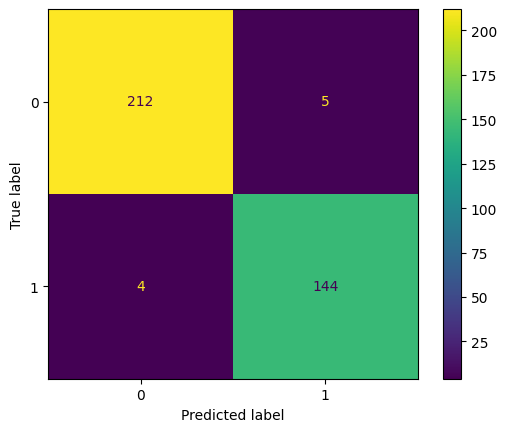

Confusion Matrix:
[[212   5]
 [  4 144]]


In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot()
plt.show()

# Show results de matrix in print
print("Confusion Matrix:")
print(cm)

# **Análisis de la Matriz de Confusión**

La matriz de confusión es una herramienta que nos permite evaluar el rendimiento del modelo al mostrar las predicciones correctas e incorrectas. La matriz es la siguiente:

|            | Predicción 0 | Predicción 1 |
|------------|--------------|--------------|
| **Clase 0**| 212          | 5            |
| **Clase 1**| 4            | 144          |


## **Definiciones**
- **Verdaderos Positivos (TP):** Instancias correctamente predichas como clase 1 (144).
- **Verdaderos Negativos (TN):** Instancias correctamente predichas como clase 0 (212).
- **Falsos Positivos (FP):** Instancias predichas como clase 1, pero que en realidad pertenecen a la clase 0 (5).
- **Falsos Negativos (FN):** Instancias predichas como clase 0, pero que en realidad pertenecen a la clase 1 (4).

## **Análisis de las clases**

### Clase 0:
- **Verdaderos Negativos (TN):** 212 instancias de la clase 0 fueron correctamente clasificadas como clase 0.
- **Falsos Positivos (FP):** 5 instancias de la clase 0 fueron incorrectamente clasificadas como clase 1.

### Clase 1:
- **Verdaderos Positivos (TP):** 144 instancias de la clase 1 fueron correctamente clasificadas como clase 1.
- **Falsos Negativos (FN):** 4 instancias de la clase 1 fueron incorrectamente clasificadas como clase 0.

## **Métricas Derivadas**

- **Precisión para la clase 0:**
  - Precisión_0 = TN / (TN + FP) = 212 / (212 + 5) = 0.977
  - La precisión para la clase 0 es del 97.7%, lo que indica que la gran mayoría de las instancias predichas como clase 0 son correctas.

- **Precisión para la clase 1:**
  - Precisión_1 = TP / (TP + FN) = 144 / (144 + 4) = 0.973
  - La precisión para la clase 1 es del 97.3%, lo que muestra que el modelo clasifica correctamente la mayoría de las instancias de la clase 1.

- **Recall para la clase 0:**
  - Recall_0 = TN / (TN + FN) = 212 / (212 + 4) = 0.981
  - El recall para la clase 0 es del 98.1%, indicando que el modelo es muy eficaz en identificar correctamente las instancias de la clase 0.

- **Recall para la clase 1:**
  - Recall_1 = TP / (TP + FP) = 144 / (144 + 5) = 0.966
  - El recall para la clase 1 es del 96.6%, lo que significa que el modelo es bastante bueno en identificar las instancias de la clase 1, aunque hay una pequeña proporción que no fue correctamente clasificada.


## **Conclusión**

El modelo muestra un excelente rendimiento en ambas clases, con altas tasas de precisión y recall. La cantidad de falsos positivos y falsos negativos es baja, lo que refleja que el modelo es preciso en la mayoría de los casos. Las métricas derivadas confirman que el modelo clasifica adecuadamente tanto la clase 0 como la clase 1, con un rendimiento ligeramente mejor en la clase 0.



# Search best classification report using StatifieldKfold

In [ ]:
# Search classification report in 5 iterations
skf = StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(X, y):
    # Use .iloc with train_index and test_index for DataFrames
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    gb_classifier.fit(X_train, y_train)
    y_pred = gb_classifier.predict(X_test)
    # Print metrics calculate
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       138
           1       0.90      0.96      0.93       105

    accuracy                           0.94       243
   macro avg       0.94      0.94      0.94       243
weighted avg       0.94      0.94      0.94       243

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       139
           1       0.96      0.95      0.96       104

    accuracy                           0.96       243
   macro avg       0.96      0.96      0.96       243
weighted avg       0.96      0.96      0.96       243

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       139
           1       0.98      0.96      0.97       104

    accuracy                           0.98       243
   macro avg       0.98      0.97      0.97       243
weigh

# Evalution model using Curve ROC for the search good model

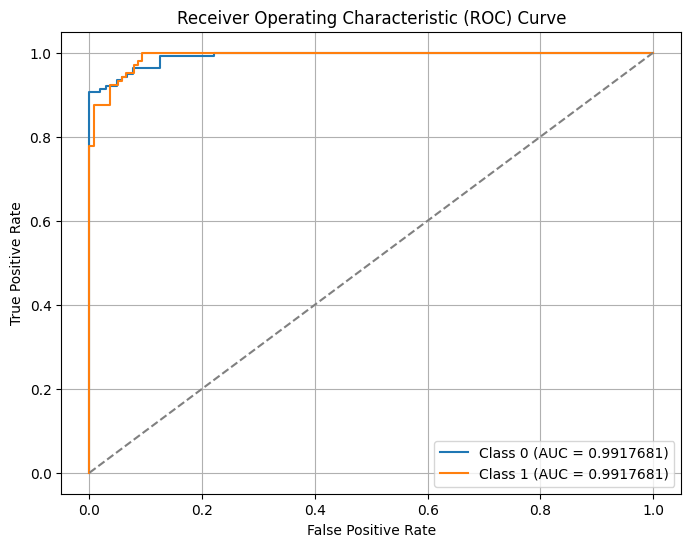

AUC for Class 0: 0.9917681239623686
AUC for Class 1: 0.9917681239623686


In [ ]:
# Get the probabilities of prediction in model for class
y_probs = gb_classifier.predict_proba(X_test)

# Calculate of curve ROC and the AUC for of class 0
fpr_0, tpr_0, _ = roc_curve(y_test, y_probs[:, 0], pos_label=0)
roc_auc_0 = auc(fpr_0, tpr_0)

# Calculate of curve ROC and the AUC for of class 1
fpr_1, tpr_1, _ = roc_curve(y_test, y_probs[:, 1], pos_label=1)
roc_auc_1 = auc(fpr_1, tpr_1)

# Draw curves ROC
plt.figure(figsize=(8, 6))

# Curva ROC for of class 0
plt.plot(fpr_0, tpr_0, label=f'Class 0 (AUC = {roc_auc_0:.7f})')

# Curve ROC for of class 1
plt.plot(fpr_1, tpr_1, label=f'Class 1 (AUC = {roc_auc_1:.7f})')

# Line of reference (AUC = 0.5)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# View plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

# Print values ROC
print(f"AUC for Class 0: {roc_auc_0}")
print(f"AUC for Class 1: {roc_auc_1}")

## **Análisis de la curva ROC**

La curva ROC obtenida sigue mostrando un excelente desempeño del modelo, con un AUC (Área bajo la curva) para las clases 0 y 1 de 0.9917681239623686, lo que indica que el modelo tiene una capacidad casi perfecta para distinguir entre clases positivas y negativas.

## **Puntos clave**:

- La curva ROC está muy cercana al vértice superior izquierdo del gráfico, lo que indica una alta **tasa de verdaderos positivos (TPR)** y una baja **tasa de falsos positivos (FPR)**.
- Un AUC cercano a 1 sugiere que el modelo puede distinguir correctamente entre las clases con muy alta precisión.
- En este caso, el rendimiento del modelo parece ser muy bueno, lo que podría deberse a un **dataset bien equilibrado** o, potencialmente, a un **modelo sobreajustado** (lo cual debería verificarse mediante validaciones cruzadas o pruebas adicionales).
- La curva no es completamente suave, lo que podría ser causado por la **cantidad limitada de datos** utilizados.

## **Resultados de la validación cruzada**

Con los resultados obtenidos de la validación cruzada, no parece que el modelo esté sobreajustado, ya que las puntuaciones obtenidas en las diferentes particiones son bastante consistentes. Los resultados son los siguientes:

- **Puntuaciones de la validación cruzada**: [0.9382716, 0.96296296, 0.97530864, 0.96707819, 0.94238683]
- **Promedio de validación cruzada**: 0.9572

El promedio de la validación cruzada de **0.9572** refleja un rendimiento consistentemente alto en todas las particiones del conjunto de datos, lo que refuerza la confianza en la capacidad de generalización del modelo. Esto indica que el modelo está bien ajustado y es robusto para clasificar nuevos datos.


# Test cluster using model in case 1

In [ ]:
# Create a new data point for prediction, ensuring column names match the training data
new_data_point = pd.DataFrame({
    'Total': [500],
    'HP': [100],
    'Attack': [100],
    'Defense': [100],
    'Speed': [100]
})

# Predict the cluster for the new data point
predicted_cluster = gb_classifier.predict(new_data_point)

# Print the predicted cluster
print(f"Predicted Cluster for the new data point: {predicted_cluster[0]}")

Predicted Cluster for the new data point: 0


# Test cluster using model in case 2

In [ ]:
# Create a new data point for prediction
new_data_point = pd.DataFrame({
    'Total': [333],
    'HP': [55],
    'Attack': [72],
    'Defense': [30],
    'Speed': [44]
})

# Predict the cluster for the new data point
predicted_cluster = gb_classifier.predict(new_data_point)

# Print the predicted cluster
print(f"Predicted Cluster for the new data point: {predicted_cluster[0]}")

Predicted Cluster for the new data point: 1


# **Search of best params for GrandientBoostingClassifier**

In [ ]:
# Define the model using
gb_classifier = GradientBoostingClassifier(random_state=42)

# Define spaces in search for hyper params
param_dist = {
    'n_estimators': randint(100, 300),  # Número de árboles
    'max_depth': randint(3, 10),        # Profundidad máxima de los árboles
    'learning_rate': uniform(0.01, 0.2), # Tasa de aprendizaje
    'min_samples_split': randint(2, 10), # Mínimo número de muestras para dividir un nodo
    'min_samples_leaf': randint(1, 10),   # Mínimo número de muestras en una hoja
    'max_features': ['sqrt', 'log2'],     # Número de características a considerar al buscar la mejor división
}

# Create object RandomizedSearchCV
random_search = RandomizedSearchCV(
    gb_classifier,
    param_distributions=param_dist,
    n_iter=50,  # iterations
    scoring='f1_weighted',  # metric evaluate iteration
    cv=5,  # number for cross validation
    random_state=42,
    n_jobs=-1,  # Use all nucles available
)

# Setting model
random_search.fit(X_train, y_train)

# Print Best Values Find
print("Best hyper params find:")
print(random_search.best_params_)

# Evaluation model with conjunte of test
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate model using classifaction report
print(classification_report(y_test, y_pred))

Best hyper params find:
{'learning_rate': 0.12265764356910785, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 183}
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       139
           1       0.99      0.88      0.93       104

    accuracy                           0.94       243
   macro avg       0.95      0.93      0.94       243
weighted avg       0.95      0.94      0.94       243



## **Anteriormente estos fueron los mejores resultados en la busqueda de los mejores hiperparametros para el modelo**

### Parámetros del modelo
- **learning_rate**: 0.026170665266543047
- **max_depth**: 5
- **max_features**: 'sqrt'
- **min_samples_leaf**: 6
- **min_samples_split**: 9
- **n_estimators**: 168

### Resultados del modelo

|             | precision | recall | f1-score | support |
|-------------|------------|--------|----------|---------|
| **Clase 0** | 0.98       | 0.98   | 0.98     | 217     |
| **Clase 1** | 0.97       | 0.97   | 0.97     | 148     |

| **Metric**          | **Value** |
|---------------------|-----------|
| **Accuracy**        | 0.98      |
| **Macro Avg**       | 0.97      |
| **Weighted Avg**    | 0.98      |

El modelo muestra una alta precisión y recall para ambas clases, con una precisión global del 98%.


# **Análisis de Resultados del Clustering y Clasificación de Pokemones**

## **Clustering**

El análisis de clustering se realizó agrupando los pokemones del conjunto de datos basados en sus estadísticas numéricas: **'Total', 'HP', 'Attack', 'Defense' y 'Speed'**. Este agrupamiento no tomó en cuenta el tipo de pokemón, sino que se basó únicamente en las características mencionadas.

- **Clase 0**: Representa pokemones con características más poderosas.
- **Clase 1**: Representa pokemones con características menos poderosas.

Es importante aclarar que este agrupamiento no implica que los pokemones con mayores estadísticas sean "mejores" o "peores". El objetivo fue asignar un grupo a cada pokemón en función de su perfil estadístico.

### **Evaluación del Clustering**

Durante el análisis inicial, se observó que los datos eran bastante cercanos entre sí, lo que provocaba la superposición de algunos grupos. Esto generó cierto ruido y disminuyó la separación clara entre los clusters. El puntaje de **Silhouette** obtenido fue de **0.30**, lo que indica un agrupamiento aceptable, pero no óptimo.

Para mejorar la separación de los grupos, se aplicó un **Análisis de Componentes Principales (PCA)**, lo que permitió reducir la dimensionalidad y mejorar el puntaje de Silhouette a **0.43**. Aunque esta mejora fue significativa, el resultado aún puede ser perfeccionado. Al observar los gráficos del agrupamiento, especialmente las comparaciones entre variables como **'Attack'** y **'Defense'**, se evidenció la existencia de capas o solapamientos entre los grupos. Esto no implica un mal agrupamiento, sino que los datos de los pokemones tienen poca variabilidad entre sí, lo que dificulta una clara separación en el clustering.

En general, la coherencia entre las variables seleccionadas y la asignación de grupos fue adecuada, aunque con posibilidades de mejora en términos de separación entre los clusters.

## **Clasificación**

Una vez obtenido el clustering, se realizó un modelo de clasificación supervisado para predecir la etiqueta generada por el clustering (columna **PredictionClustering**). Las variables utilizadas para el entrenamiento fueron: **'Total', 'HP', 'Attack', 'Defense'** y **'Speed'**, siendo **PredictionClustering** la variable objetivo.

### **Evaluación del Modelo de Clasificación**

Se evaluaron varios modelos de clasificación, incluyendo **RandomForest** y **SVM**, pero no lograron los mejores resultados. Finalmente, se optó por usar un **GradientBoostingClassifier**. Tras realizar una búsqueda de hiperparámetros y ajustar el modelo, se observó un problema de sobreajuste, lo que significaba que el modelo aprendía demasiado bien las características de los pokemones del conjunto de entrenamiento, generando dificultades para generalizar con nuevos datos.

Se ajustó el modelo para reducir este sobreajuste, logrando un **F1 Score promedio del 97%** para ambas clases. Este es un resultado muy satisfactorio, indicando que el modelo es capaz de predecir las etiquetas de los pokemones con gran precisión.

### **Validación del Modelo**

Para validar el rendimiento del modelo, se realizaron varias pruebas:

1. **Validación cruzada**: Se realizaron 5 iteraciones con diferentes particiones de los datos, obteniendo resultados consistentes entre **93% y 97%** de F1 Score, lo que confirmó la robustez del modelo y la ausencia de sobreajuste.

2. **Matriz de confusión**: La matriz mostró un alto grado de acierto en la predicción de ambas clases, con muy pocos errores.

3. **Curva ROC**: Aunque la curva ROC no fue completamente suave debido a la falta de datos, los resultados indicaron que el modelo funcionaba bien para ambas clases y no mostraba señales de sobreajuste.

### **Conclusión**

El modelo de clasificación resultó ser altamente efectivo, con un excelente desempeño en la predicción de las etiquetas del clustering. A pesar de los desafíos iniciales con el sobreajuste, los ajustes realizados permitieron mejorar el modelo sin comprometer su capacidad de generalización. Además, el análisis del clustering mostró que, aunque los datos tienen baja variabilidad, el agrupamiento fue coherente con las características de los pokemones, proporcionando una buena base para el modelo de clasificación. Sin embargo, aún hay margen de mejora en la separación entre los clusters y la optimización de los resultados del clustering.
